#  **<<< Only Problem 1, 4 and 9 will be graded >>>**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

## Problem 1
Sketch the following signals
1.
$x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$


2.
$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$

3.
$x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$

4.
$x(t) = u(t) + 5u(t-1) -2u(t-2)$

5.
$x(t) = r(t) - r(t-1) - u(t-2)$




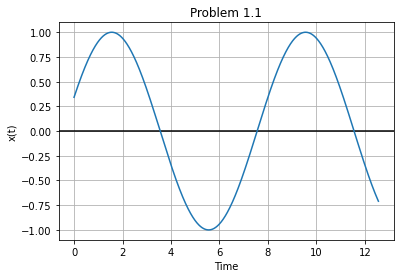

In [ ]:
plt.title('Problem 1.1')
plt.xlabel('Time')
plt.ylabel('x(t)')

x = np.arange(0,4*np.pi,0.01)
y = np.sin(x*np.pi/4 + np.pi/9)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x,y)
plt.show()

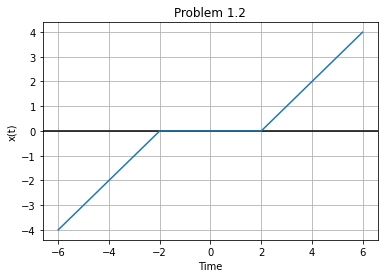

In [ ]:
plt.title('Problem 1.2')
plt.xlabel('Time')
plt.ylabel('x(t)')

def x_t(x):
  if x <= -2:
    return x+2
  elif -2 <= x <= 2:
    return 0
  else:
    return x-2

x = np.arange(-6,6,0.01)
np_x_t = np.vectorize(x_t)
y = np_x_t(x)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x,y)
plt.show()

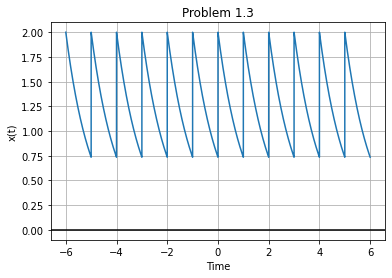

In [ ]:
import math

plt.title('Problem 1.3')
plt.xlabel('Time')
plt.ylabel('x(t)')

x = np.arange(-6,6,0.000001)
y = 2*np.exp(-(x%1))

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x,y)
plt.show()

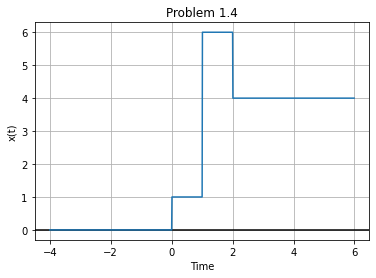

In [ ]:
plt.title('Problem 1.4')
plt.xlabel('Time')
plt.ylabel('x(t)')

x = np.arange(-4,6,0.01)
y = np.heaviside(x,1) + 5*np.heaviside(x-1,1) - 2*np.heaviside(x-2,1)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x,y)
plt.show()

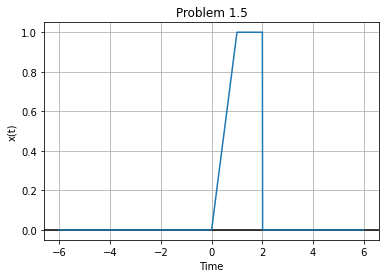

In [ ]:
plt.title('Problem 1.5')
plt.xlabel('Time')
plt.ylabel('x(t)')

x = np.arange(-6,6,0.01)
y = np.maximum(0,x) - np.maximum(0,x-1) - np.heaviside(x-2,1)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x,y)
plt.show()

## Problem 2
Determine whether each of following signals is periodic, and if so, find its period.
1.
$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$
2.
$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.
$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $


## Problem 3
Determine whether the following signals are power or energy signals or neither. Justify your answers

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$



## Problem 4
For the discrete time signal x[n] shown in Figure below, sketch each of the following

1. $x[2-n] $
2. $x[3n-4] $
3. $x\left[ \frac{2}{3}n+1 \right]  $
4. $x\left[-\frac{n+8}{4} \right] $
5. $x[n^3] $
8. $x[2-n] +x[3n-4] $

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


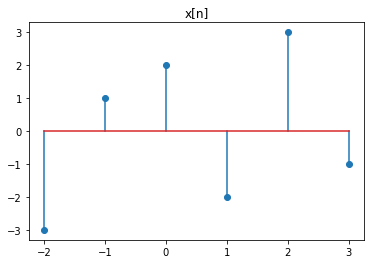

In [ ]:
# x[n]
t = np.arange(-2,4)
x_t = np.array([-3,1,2,-2,3,-1])
plt.stem(t, x_t)
plt.title('x[n]')
plt.show()

In [ ]:
def convert_to_int(x, y):
  int_x = list()
  int_y = list()
  for a, b in zip(x, y):
    if a%1 < 0.0000001:
      int_x.append(a)
      int_y.append(b)
  return (int_x, int_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


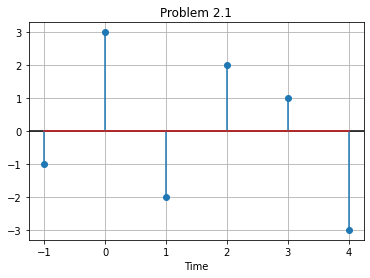

In [ ]:
plt.title('Problem 2.1')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list(-t+2), list(x_t))
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


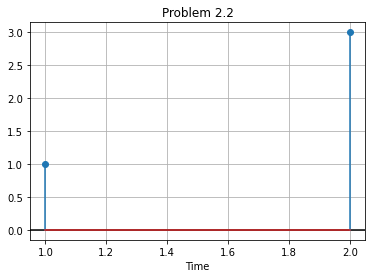

In [ ]:
plt.title('Problem 2.2')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list((t+4)/3), list(x_t))
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


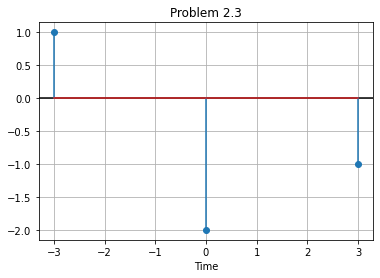

In [ ]:
plt.title('Problem 2.3')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list((t-1)*3/2), list(x_t))
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


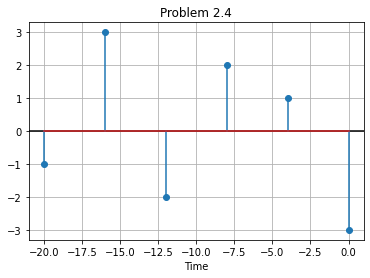

In [ ]:
plt.title('Problem 2.4')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list(-4*t-8), list(x_t))
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


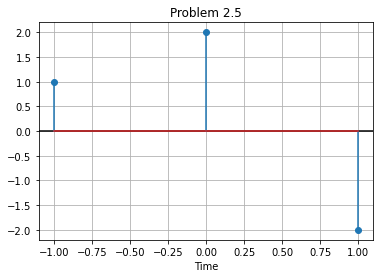

In [ ]:
plt.title('Problem 2.5')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list(np.cbrt(t)), list(x_t))
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t)
plt.show()

([0, 1, 2, 3, 4, -1], [3, -1, 5, 1, -3, -1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


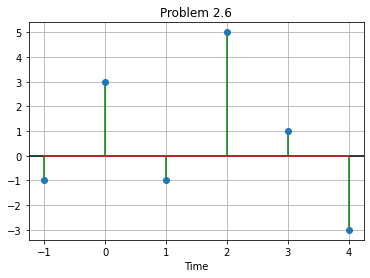

In [ ]:
plt.title('Problem 2.6')
plt.xlabel('Time')

(new_t, new_x_t) = convert_to_int(list(-t+2), list(x_t))
int_t_1 = np.array(new_t)
int_x_t_1 = np.array(new_x_t)

(new_t, new_x_t) = convert_to_int(list((t+4)/3), list(x_t))
int_t_2 = np.array(new_t)
int_x_t_2 = np.array(new_x_t)

def add_discrete(int_t_1, int_x_t_1, int_t_2, int_x_t_2):
  merged_t = list(set(int_t_1).union(set(int_t_2)))
  merged_x_t = list()
  for t in merged_t:
    tmp = 0
    for t1, xt1 in zip(int_t_1, int_x_t_1):
      if t1 == t:
        tmp += xt1
    for t2, xt2 in zip(int_t_2, int_x_t_2):
      if t2 == t:
        tmp += xt2
    merged_x_t.append(tmp)
  print((merged_t, merged_x_t))
  return (merged_t, merged_x_t)

(new_t, new_x_t) = add_discrete(int_t_1, int_x_t_1, int_t_2, int_x_t_2)
int_t = np.array(new_t)
int_x_t = np.array(new_x_t)

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.stem(int_t, int_x_t, 'g')
plt.show()

## Problem 5
Determine whether each of following signals is periodic, and if so, find its period.

1.
$x[n] = \sin \left( \frac{\pi n}{4} + \frac{\pi}{8}\right)$

1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \sin\left( \frac{\pi}{3}n\right)$

1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right)\sin\left( \frac{\pi}{3}n\right)$

1.
$x[n] = \exp \left( \frac{6\pi}{5}n \right)$

1.
$x[n] = \exp \left( j\frac{5\pi}{6}n \right)$

1.
$x[n] =  \sum_{m=-\infty}^{\infty} \left[ \delta[n-2m] + 2\delta[n-3m] \right]$

<!-- 1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \cos \left( \frac{\pi}{3} n \right)$ -->

 ## Problem 6

 [python] Signal transformations :
 Study the sawtooth function in the figure below. Apply reflection, scaling, shifting operations to the signal and plot the transformed signals compared with the original sawtooth signal.  


In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))
# plt.show()

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# scaling factor = 3 and 1/3
## TODO : writing code for time scaling

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# shifting t to the left and right 0.05 units

## TODO : writing code for time shifting

In [ ]:
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

## TODO : writing code for time Reflection


  ## Problem 7
 [python] Elementary signals: study  the ramp signal plotted in the example below. \\
TODO : plot these signals

1.   Unit step function
2.   Unit impulse function



In [ ]:
# t = np.linspace(-1, 1, 500)
# ramp_t = t.copy()
# ramp_t[ramp_t < 0 ] = 0
# plt.plot(t, ramp_t)
# plt.show()

In [ ]:
## TODO : writing code for plotting unit step function

In [ ]:
## TODO : writing code for plotting unit impulse function

## Problem 8
Express the signal that shown in Figure below using Unit-ramp functions



<a href="https://ibb.co/pXt8t2Y"><img src="https://i.ibb.co/DKxyx40/Screen-Shot-2564-08-11-at-15-16-52.png" alt="Screen-Shot-2564-08-11-at-15-16-52" border="0"></a>



## Problem 9

Evaluate the following integrals

1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt$

1. $\int_{-\infty}^{\infty} (t-1) \delta \left(\frac{2}{3}t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$

In [ ]:
# solutions and answers are in write_up file